#Imports and data loading

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('temperature_data_clean.csv', encoding = 'utf-8')

#Create date column and temperature avg column

In [ ]:
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

In [ ]:
df['temperature_avg'] = (df['temperature_min'] + df['temperature_max']) / 2

#Understand the data- Inspect the data

In [16]:
df.head(5)

,longitude,latitude,code,state,station,temperature_min,temperature_max,year,month,region,date,temperature_avg
0,-102.71,21.85,CALVILLO,Aguascalientes,Calvillo Ags. SMN*,5.4,26.8,2024,1,Centro-Norte,2024-01-01,16.10
1,-102.32,21.70,MMAS,Aguascalientes,Aeropuerto Internacional de Aguascalientes Ags.*,6.7,23.4,2024,1,Centro-Norte,2024-01-01,15.05
2,-102.37,21.78,NGRAG,Aguascalientes,El Niï¿½gara Ags.,3.6,24.1,2024,1,Centro-Norte,2024-01-01,13.85
3,-102.79,21.81,MNLAG,Aguascalientes,Media Luna Ags.,3.4,27.2,2024,1,Centro-Norte,2024-01-01,15.30
4,-102.29,21.85,OBSAG,Aguascalientes,Observatorio de Aguascalientes Ags.,6.2,25.0,2024,1,Centro-Norte,2024-01-01,15.60


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27639 entries, 0 to 27638
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   longitude        27639 non-null  float64       
 1   latitude         27639 non-null  float64       
 2   code             27639 non-null  object        
 3   state            27639 non-null  object        
 4   station          27635 non-null  object        
 5   temperature_min  27639 non-null  float64       
 6   temperature_max  27639 non-null  float64       
 7   year             27639 non-null  int64         
 8   month            27639 non-null  int64         
 9   region           27639 non-null  object        
 10  date             27639 non-null  datetime64[ns]
 11  temperature_avg  27639 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [ ]:
df.describe()

In [26]:
df['state'].value_counts()

state
Sonora                 3280
Chihuahua              1461
Guanajuato             1443
Veracruz               1435
Zacatecas              1242
Chiapas                1169
Morelos                1142
Tamaulipas             1128
Jalisco                1112
Puebla                 1098
Estado de México       1090
Oaxaca                  962
Sinaloa                 936
Durango                 897
Guerrero                894
Michoacán               870
Baja California         754
Baja California Sur     690
Ciudad de México        685
Coahuila                659
Yucatán                 596
Campeche                506
Nuevo León              479
San Luis Potosí         478
Hidalgo                 431
Aguascalientes          393
Colima                  384
Tabasco                 381
Quintana Roo            332
Querétaro               271
Tlaxcala                225
Nayarit                 216
Name: count, dtype: int64

In [27]:
df_region_year =df.groupby(['region','year']).agg({
    'temperature_min': ['min'],
    'temperature_max': ['max'],
    'temperature_avg' : ['mean']
})

In [28]:
df_region_year

temperature_min temperature_max temperature_avg
                              min             max            mean
region       year                                                
Centro       2024            -2.0       43.100000       19.466574
             2025            -0.7       40.800000       19.313305
Centro-Norte 2024            -2.1       43.900000       20.389181
             2025            -1.7       40.800000       20.135656
Noroeste     2024             3.9       43.700000       25.104241
             2025             2.0       43.100000       25.346607
Norte        2024           -11.6       48.869231       22.275928
             2025           -12.2       46.800000       22.993226
Occidente    2024            -0.5       42.600000       22.789457
             2025             1.5       40.800000       22.909211
Oriente      2024            -2.4       43.500000       23.887906
             2025             1.2       40.500000       23.884877
Sur          2024             0.1       44.900000       25.604951
             2025             3.1       43.700000       25.575253
Sureste      2024            13.0       44.000000       28.118143
             2025            15.6       42.000000       28.325218

#Build visualizations

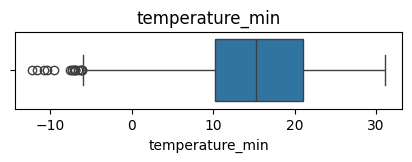

In [37]:
# Create a boxplot to visualize distribution of temperature_min
plt.figure(figsize=(5,1))
plt.title('temperature_min')
sns.boxplot(x=df['temperature_min']);

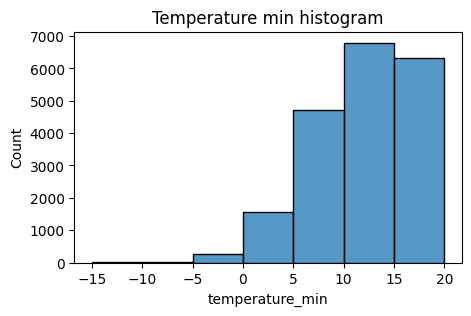

In [32]:
#Create a histogram of the values in the temperature_min
plt.figure(figsize=(5,3))
sns.histplot(df['temperature_min'], bins=range(-15,25,5))
plt.title('Temperature min histogram');

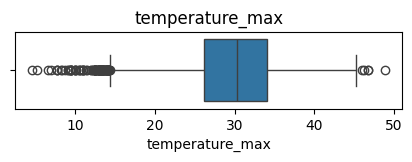

In [38]:
# Create a boxplot to visualize distribution of temperature_max
plt.figure(figsize=(5,1))
plt.title('temperature_max')
sns.boxplot(x=df['temperature_max']);

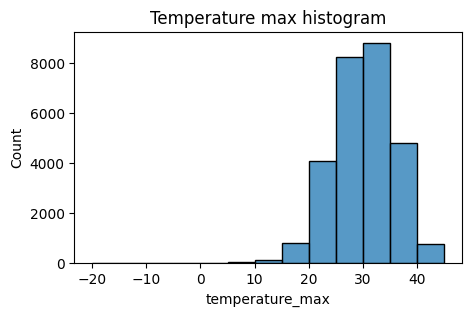

In [39]:
#Create a histogram of the values in the temperature_max
plt.figure(figsize=(5,3))
sns.histplot(df['temperature_max'], bins=range(-20,50,5))
plt.title('Temperature max histogram');

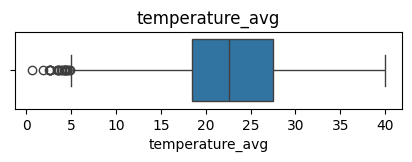

In [40]:
# Create a boxplot to visualize distribution of temperature_avg
plt.figure(figsize=(5,1))
plt.title('temperature_avg')
sns.boxplot(x=df['temperature_avg']);

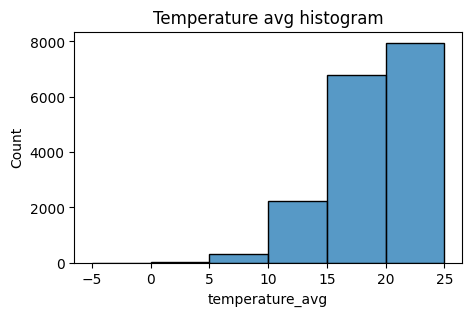

In [41]:
#Create a histogram of the values in the temperature_max
plt.figure(figsize=(5,3))
sns.histplot(df['temperature_avg'], bins=range(-5,30,5))
plt.title('Temperature avg histogram');

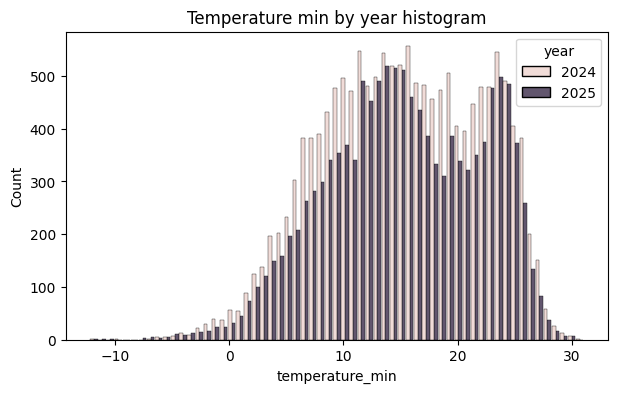

In [ ]:
#Histogram of temperature_min by year
plt.figure(figsize=(7,4))
sns.histplot(data=df,
x='temperature_min',
hue='year',
multiple='dodge',
shrink=0.9)
plt.title('Temperature min by year histogram');

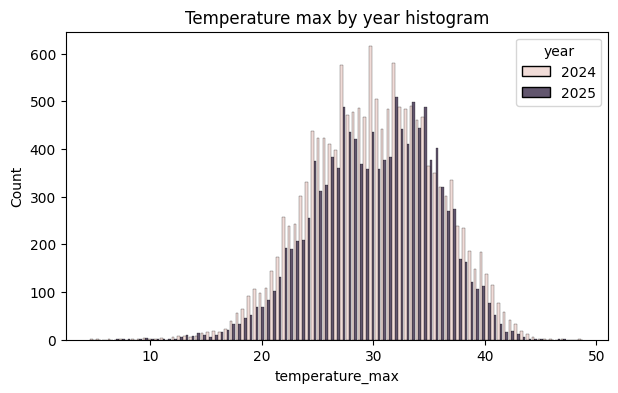

In [45]:
#Histogram of temperature_max by year
plt.figure(figsize=(7,4))
sns.histplot(data=df,
x='temperature_max',
hue='year',
multiple='dodge',
shrink=0.9)
plt.title('Temperature max by year histogram');

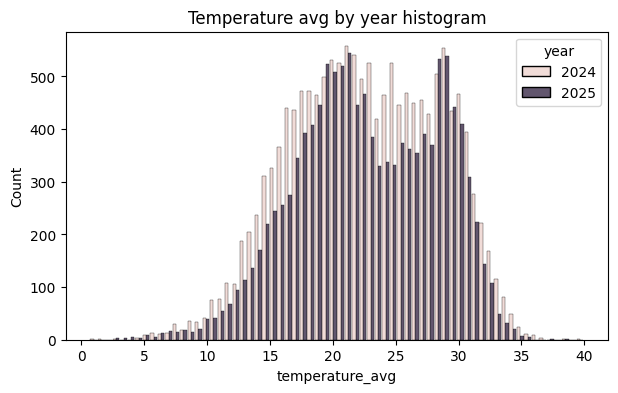

In [46]:
#Histogram of temperature_avg by year
plt.figure(figsize=(7,4))
sns.histplot(data=df,
x='temperature_avg',
hue='year',
multiple='dodge',
shrink=0.9)
plt.title('Temperature avg by year histogram');